# Task 7 - Level 2 - Fraud Detection

Fraud detection involves identifying and preventing deceptive activities within financial transactions or systems. Leveraging advanced analytics and machine learning techniques, fraud detection systems aim to distinguish between legitimate and fraudulent behavior. Key components include anomaly detection, pattern recognition, and real-time monitoring.

<b> Dataset </b>- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

<b> Done By </b> - Shweta Alukuru Trikutam

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Understanding

In [2]:
df = pd.read_csv(r"C:\Users\shwet\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [6]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


> No missing values present

## 3. EDA

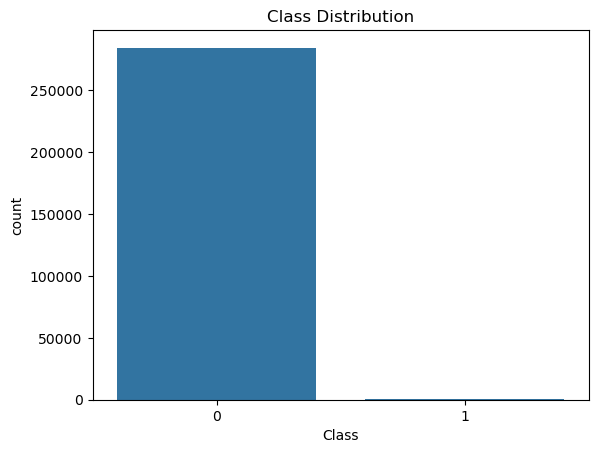

In [7]:
# Class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

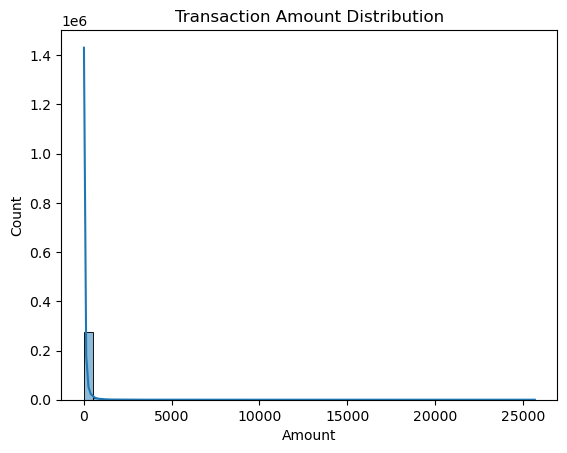

In [9]:
# Transaction Amount distribution
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

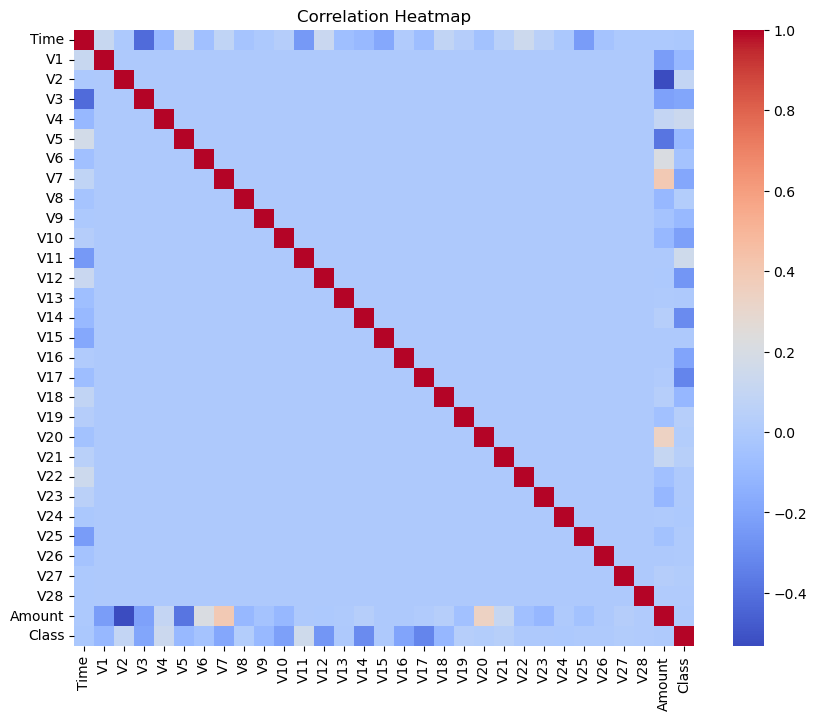

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 4. Handling Class Imbalance

In [12]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = df[df.Class == 0]
minority = df[df.Class == 1]

In [13]:
# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

In [14]:
# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

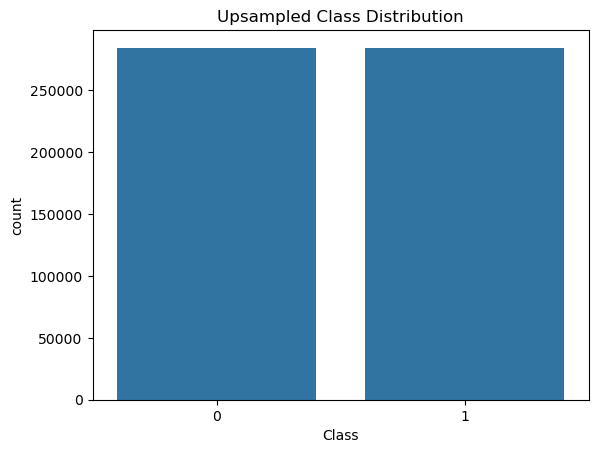

In [15]:
# Display new class counts
sns.countplot(x='Class', data=upsampled)
plt.title('Upsampled Class Distribution')
plt.show()

## 5. Feature Engineering

In [16]:
from sklearn.preprocessing import StandardScaler

# Normalize the 'Amount' feature
scaler = StandardScaler()
upsampled['Amount'] = scaler.fit_transform(upsampled['Amount'].values.reshape(-1, 1))

# Creating new features (example: transaction frequency)
upsampled['Time'] = upsampled['Time'] / 3600  # Convert time to hours


## 6. Model Selection and Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X = upsampled.drop('Class', axis=1)
y = upsampled['Class']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56746
           1       1.00      1.00      1.00     56980

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56739     7]
 [    0 56980]]


## 7. Real-time Monitoring System

In [29]:
def predict_transaction(amount, time):
    transaction = pd.DataFrame({'Time': [time], 'Amount': [amount]})
    transaction['Amount'] = scaler.transform(transaction['Amount'].values.reshape(-1, 1))
    transaction[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
                 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']] = 0
    
    transaction['Time'] = transaction['Time'] / 3600 

    
    # Make prediction
    prediction = model.predict(transaction)
    if prediction[0] == 1:
        return "Fraudulent Transaction Detected"
    else:
        return "Transaction Approved"

